# Salaries Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.sample(3)   #chooses the sample at random from the data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,Prof,B,45,39,Male,115000
46,Prof,B,40,28,Male,98193
343,Prof,B,31,31,Male,162150


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.isnull().sum()    #to check if there are any missing values present in the data

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='rank', ylabel='salary'>

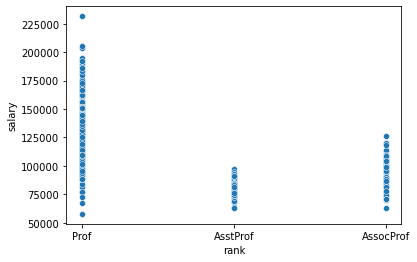

In [6]:
import seaborn as sns
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

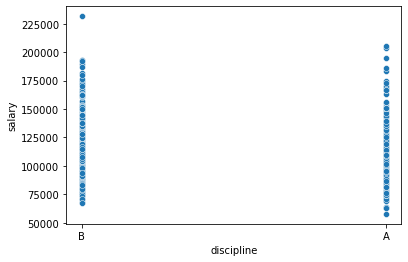

In [7]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

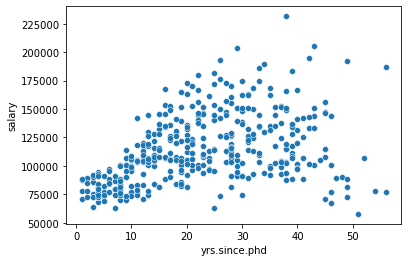

In [8]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

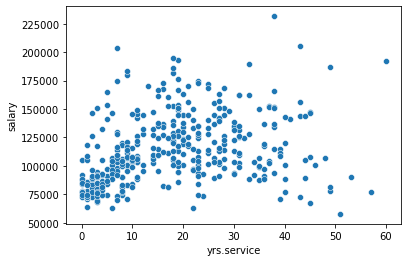

In [9]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

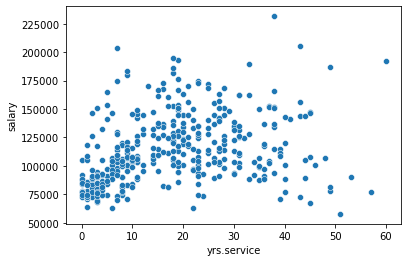

In [10]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

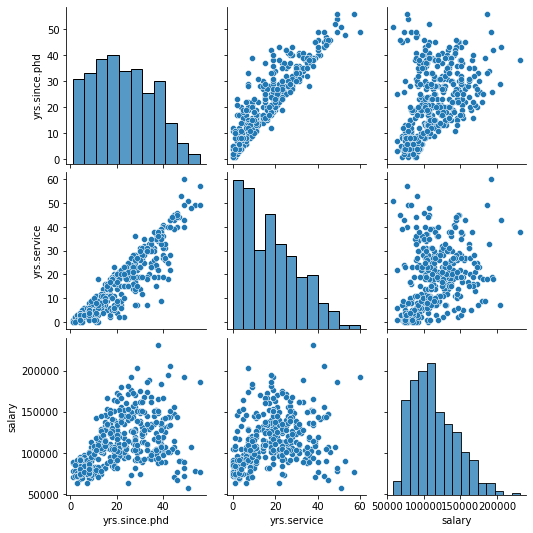

In [11]:
sns.pairplot(df)

# Correlation

In [12]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [13]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

In [14]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

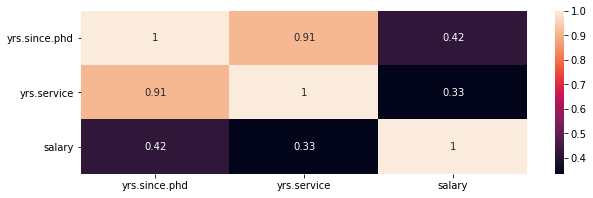

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
sns.heatmap(df.corr(),annot=True)

Outcome of correlation

1. yrs.since.phd has hightest correlation with salary which means they share a strong bond
2. yrs.service has the lowest correlation with salary which means they share a weak bond

# Describing dataset

In [16]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


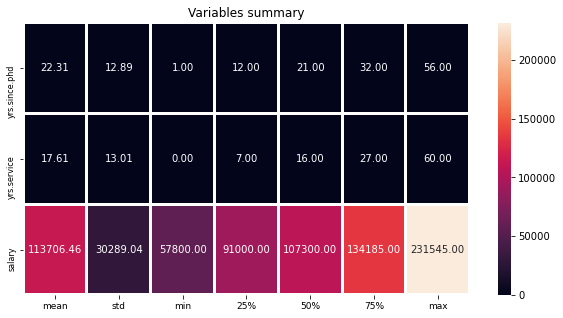

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')   #fmt= represnt the number of float characters
plt.xticks(fontsize=9)
plt.yticks(fontsize=8)
plt.title('Variables summary')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [19]:
import warnings
warnings.filterwarnings('ignore')

yrs.since.phd       AxesSubplot(0.125,0.536818;0.110714x0.343182)
yrs.service      AxesSubplot(0.257857,0.536818;0.110714x0.343182)
salary           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
dtype: object

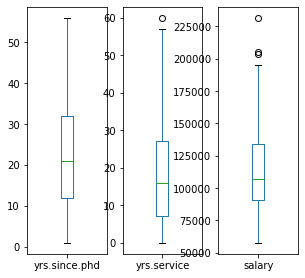

In [20]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [21]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:>

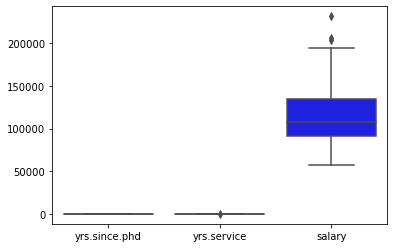

In [22]:
sns.boxplot(data=df, color='blue')

# Normal Distribution Curve

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

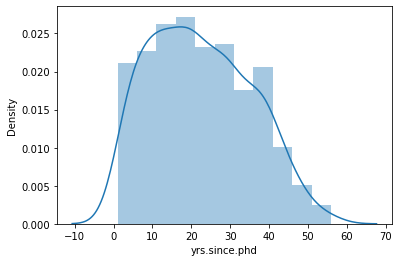

In [23]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

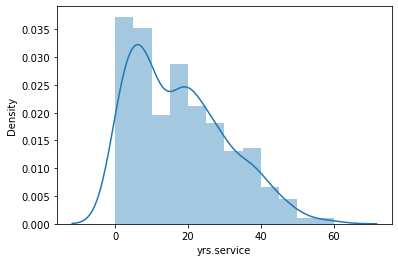

In [24]:
sns.distplot(df['yrs.service'])

# The normal distribution shows that the data is skewed

# Data Cleaning

In [25]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

In [26]:
data=pd.DataFrame([['yrs.service','0.334745','No','Yes']],
                  columns=['Column Name','Correlation with target','Normalised','Outliers'])
data

,Column Name,Correlation with target,Normalised,Outliers
0,yrs.service,0.334745,No,Yes


In [27]:
df= df.drop(['yrs.service'],axis=1)
df

,rank,discipline,yrs.since.phd,sex,salary
0,Prof,B,19,Male,139750
1,Prof,B,20,Male,173200
2,AsstProf,B,4,Male,79750
3,Prof,B,45,Male,115000
4,Prof,B,40,Male,141500
...,...,...,...,...,...
392,Prof,A,33,Male,103106
393,Prof,A,31,Male,150564
394,Prof,A,42,Male,101738
395,Prof,A,25,Male,95329


In [140]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le=LabelEncoder()


list=['sex']

for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

df

,yrs.since.phd,sex,salary
0,19,1,139750
1,20,1,173200
2,4,1,79750
3,45,1,115000
4,40,1,141500
...,...,...,...
392,33,1,103106
393,31,1,150564
394,42,1,101738
395,25,1,95329


# Removing Outliers

Z-score technique

In [146]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 3)

In [147]:
threshold=3
#index number
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 132, 133, 148, 153, 179, 186, 218, 230,
       231, 233, 237, 245, 253, 254, 274, 316, 323, 332, 334, 341, 358,
       361, 364], dtype=int64), array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int64))


In [90]:
df.iloc[123]

yrs.since.phd       25
sex                  0
salary           62884
Name: 123, dtype: int64

In [148]:
len(np.where(z>3)[0])

41

In [149]:
df.drop([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 132, 133, 148, 153, 179, 186, 218, 230,
       231, 233, 237, 245, 253, 254, 274, 316, 323, 332, 334, 341, 358,
       361, 364], axis=0)

,yrs.since.phd,sex,salary
0,19,1,139750
1,20,1,173200
2,4,1,79750
3,45,1,115000
4,40,1,141500
...,...,...,...
392,33,1,103106
393,31,1,150564
394,42,1,101738
395,25,1,95329


In [150]:
df_new=df[(z<3).all(axis=1)]

In [151]:
print('old dataframe:', df.shape)
print('new dataframe:',df_new)
print('total dropped rows:', df.shape[0]-df_new.shape[0])

old dataframe: (397, 3)
new dataframe:      yrs.since.phd  sex  salary
0               19    1  139750
1               20    1  173200
2                4    1   79750
3               45    1  115000
4               40    1  141500
..             ...  ...     ...
392             33    1  103106
393             31    1  150564
394             42    1  101738
395             25    1   95329
396              8    1   81035

[356 rows x 3 columns]
total dropped rows: 41


# Percentage Data Loss

In [152]:
loss_percent= (397-356)/397*100
print(loss_percent, '%')

10.327455919395465 %


In [153]:
df_new

,yrs.since.phd,sex,salary
0,19,1,139750
1,20,1,173200
2,4,1,79750
3,45,1,115000
4,40,1,141500
...,...,...,...
392,33,1,103106
393,31,1,150564
394,42,1,101738
395,25,1,95329


In [154]:
#independent column
x= df_new.iloc[:,:-1]

In [155]:
#target column
y= df_new.iloc[:,-1]

# Transforming data to remove skewness

In [156]:
from sklearn.preprocessing import power_transform

In [157]:
x= power_transform(x, method='yeo-johnson')
x

array([[-0.17638176,  0.        ],
       [-0.09846357,  0.        ],
       [-1.64587535,  0.        ],
       [ 1.5333597 ,  0.        ],
       [ 1.24215537,  0.        ],
       [-1.39448131,  0.        ],
       [ 0.61456198,  0.        ],
       [ 1.5333597 ,  0.        ],
       [-0.02196957,  0.        ],
       [-0.77203679,  0.        ],
       [-1.27943248,  0.        ],
       [-2.11757054,  0.        ],
       [-1.94095246,  0.        ],
       [-0.09846357,  0.        ],
       [-0.77203679,  0.        ],
       [-0.17638176,  0.        ],
       [ 1.12185707,  0.        ],
       [ 1.06081361,  0.        ],
       [ 0.68053831,  0.        ],
       [ 0.99914485,  0.        ],
       [ 0.87383561,  0.        ],
       [ 0.19981351,  0.        ],
       [-0.02196957,  0.        ],
       [ 0.93682723,  0.        ],
       [-1.51610109,  0.        ],
       [-0.86641429,  0.        ],
       [-0.77203679,  0.        ],
       [-0.09846357,  0.        ],
       [-1.27943248,

In [158]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[-0.17638176,  0.        ],
       [-0.09846357,  0.        ],
       [-1.64587535,  0.        ],
       [ 1.5333597 ,  0.        ],
       [ 1.24215537,  0.        ],
       [-1.39448131,  0.        ],
       [ 0.61456198,  0.        ],
       [ 1.5333597 ,  0.        ],
       [-0.02196957,  0.        ],
       [-0.77203679,  0.        ],
       [-1.27943248,  0.        ],
       [-2.11757054,  0.        ],
       [-1.94095246,  0.        ],
       [-0.09846357,  0.        ],
       [-0.77203679,  0.        ],
       [-0.17638176,  0.        ],
       [ 1.12185707,  0.        ],
       [ 1.06081361,  0.        ],
       [ 0.68053831,  0.        ],
       [ 0.99914485,  0.        ],
       [ 0.87383561,  0.        ],
       [ 0.19981351,  0.        ],
       [-0.02196957,  0.        ],
       [ 0.93682723,  0.        ],
       [-1.51610109,  0.        ],
       [-0.86641429,  0.        ],
       [-0.77203679,  0.        ],
       [-0.09846357,  0.        ],
       [-1.27943248,

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
lr=LinearRegression()

In [160]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.33,random_state=42)

In [128]:
print('error:')
print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean Squared error:', mean_squared_error(y_test,pred))
print('Root Mean Squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 21921.15413868124
Mean Squared error: 811689642.1165358
Root Mean Squared error: 28490.167463820493


In [124]:
#r2 score--> coefficient of determination
#is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
#ie, change coming in y whenever x is changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.14858348708731706
